In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pathlib import Path
import pandas as pd
from ecephys_analyses.data import paths

from ecephys import sglx_utils


# Channel depths

In [18]:
from pathlib import Path

In [26]:
# Doppio parietal
# metapath = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX4-Doppio/baseline-sleep-2h-circadian-match_imec0/3-17-2020/catgt_3-17-2020_g0/3-17-2020_g0_imec0/3-17-2020_g0_tcat.imec0.ap.meta')
# # Charles parietal
# metapath = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/baseline-sleep-2h-circadian-match_imec1/7-10-2021/catgt_7-10-2021_g0/7-10-2021_g0_imec1/7-10-2021_g0_tcat.imec1.ap.meta')
# Allan parietal
metapath = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX8-Allan/baseline-sleep-2h-circadian-match_imec1/3-1-2021/catgt_3-1-2021_C_g0/3-1-2021_C_g0_imec1/3-1-2021_C_g0_tcat.imec1.ap.meta')

In [29]:
from ecephys_analyses.data.utils import depth_from_channel

depth_from_channel(metapath, [1, 41, 42, 73, 74, 164, 165, 201, 202, 302, 303, 384])
# (array([286]),)
# (array([175]),)
# (array([290]

0
1 820.0
2 840.0
3 860.0
4 880.0
5 900.0
6 920.0
7 940.0
8 960.0
9 980.0
10 1000.0
11 1020.0
12 1040.0
13 1060.0
14 1080.0
15 1100.0
16 1120.0
17 1140.0
18 1160.0
19 1180.0
20 1200.0
21 1220.0
22 1240.0
23 1260.0
24 1280.0
25 1300.0
26 1320.0
27 1340.0
28 1360.0
29 1380.0
30 1400.0
31 1420.0
32 1440.0
33 1460.0
34 1480.0
35 1500.0
36 1520.0
37 1540.0
38 1560.0
39 1580.0
40 1600.0
41 1620.0
42 1640.0
43 1660.0
44 1680.0
45 1700.0
46 1720.0
47 1740.0
48 1760.0
49 1780.0
50 1800.0
51 1820.0
52 1840.0
53 1860.0
54 1880.0
55 1900.0
56 1920.0
57 1940.0
58 1960.0
59 1980.0
60 2000.0
61 2020.0
62 2040.0
63 2060.0
64 2080.0
65 2100.0
66 2120.0
67 2140.0
68 2160.0
69 2180.0
70 2200.0
71 2220.0
72 2240.0
73 2260.0
74 2280.0
75 2300.0
76 2320.0
77 2340.0
78 2360.0
79 2380.0
80 2400.0
81 2420.0
82 2440.0
83 2460.0
84 2480.0
85 2500.0
86 2520.0
87 2540.0
88 2560.0
89 2580.0
90 2600.0
91 2620.0
92 2640.0
93 2660.0
94 2680.0
95 2700.0
96 2720.0
97 2740.0
98 2760.0
99 2780.0
100 2800.0
101 2820.0
102 

[(1, 820.0),
 (41, 1620.0),
 (42, 1640.0),
 (73, 2260.0),
 (74, 2280.0),
 (164, 4080.0),
 (165, 4100.0),
 (201, 4820.0),
 (202, 4840.0),
 (302, 6840.0),
 (303, 6860.0),
 (384, 8480.0)]

In [8]:
from ecephys.units.io import get_cluster_info


In [10]:
df = get_cluster_info(Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX4-Doppio/sleep-homeostasis-2h_imec0/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1'))

In [41]:
df = get_cluster_info(Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/sleep-homeostasis-2h_imec1/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1'))

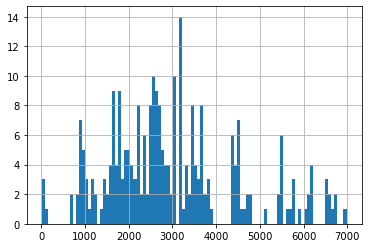

In [19]:
df.depth.hist(bins=100)

In [44]:
df.columns

Index(['cluster_id', 'Unnamed: 1', 'Amplitude', 'ContamPct', 'KSLabel', 'amp',
       'amplitude_cutoff', 'ch', 'cumulative_drift', 'd_prime', 'depth',
       'epoch_name', 'firing_rate', 'fr', 'group', 'isi_viol',
       'isolation_distance', 'l_ratio', 'max_drift', 'n_spikes', 'nn_hit_rate',
       'nn_miss_rate', 'presence_ratio', 'sh', 'silhouette_score'],
      dtype='object')

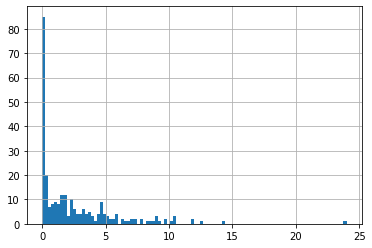

In [45]:
df.fr.hist(bins=100)

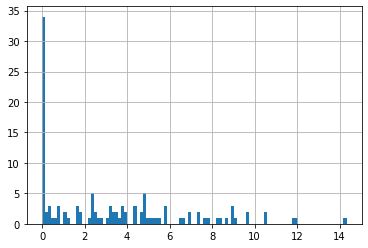

In [48]:
df[
    (df['isi_viol'] < 0.5)
    & (df['depth'] > 800)
    & (df['depth'] < 3800)
].fr.hist(bins=100)

In [12]:
# Check depths

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from ecephys_analyses.on_off import run_on_off_detection, get_on_off_df_filename
from ecephys_analyses.data_mgmt.paths import get_datapath
import pandas as pd

from ecephys_analyses.data.channel_groups import region_depths
from ecephys_analyses.data import paths
import ecephys.units

import itertools 

from joblib import Parallel, delayed

In [7]:
import altair as alt

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [6]:
data_conditions = [
    (
        'Doppio',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Charles',
        'sleep-homeostasis-2h_imec1',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Allan',
        'sleep-homeostasis-2h_imec1',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Segundo',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_1_metrics_1',
    ),
    (
        'Alessandro',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
]



FR_interval = (0.5, 10) # Hz

good_only = False

root_key = 'sleep-homeostasis'

regions_list = ['hypothalamus_outer', 'thalamus_outer', 'hippocampus_outer', 'cortex_outer']
regions_list = ['hypothalamus', 'thalamus', 'hippocampus', 'cortex']
regions_list = ['VPM_outer', 'Po_outer', 'LPMR_outer']

In [7]:

info_dfs = []
for (
    subject, condition, sorting_condition, 
) in data_conditions:
    
    probe = 'imec0' if 'imec0' in condition else 'imec1'
    dataset = f"{subject}_{probe}"

    # load cluster_info.tsv to subset clusters
    ks_dir = get_datapath(
        subject,
        condition,
        sorting_condition,
        root_key=root_key,
    )
    info = ecephys.units.get_cluster_info(ks_dir)
    info['dataset'] = dataset

    from ecephys_analyses.data.channel_groups import get_regions
    info['region'] = get_regions(subject, condition, regions_list, info.depth)

    info_dfs.append(info)
    


cluster_info = pd.concat(info_dfs)

cluster_info = cluster_info[cluster_info['group'] != 'noise']

# assert len(off_dat.subject.unique()) == 1

In [8]:
alt.Chart(cluster_info).mark_bar(
).encode(
    x=alt.X('depth:Q', bin=alt.Bin(maxbins=100)),
    y='count():Q',
    column='dataset',
    row='group',
    color='region',
)

alt.Chart(...)

In [9]:
cluster_info_select = cluster_info[
    (cluster_info['fr'] >= FR_interval[0])
    & (cluster_info['fr'] <= FR_interval[1])
    & (cluster_info['isi_viol'] <= 0.25)
]

In [10]:
alt.Chart(cluster_info_select).mark_bar(
).encode(
    x=alt.X('depth:Q', bin=alt.Bin(maxbins=100)),
    y='count():Q',
    column='dataset',
    color='region',
)

alt.Chart(...)

In [8]:
data_conditions = [
    (
        'Doppio',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Doppio',
        'sleep-homeostasis-2h_imec1',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Charles',
        'sleep-homeostasis-2h_imec1',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Charles',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Allan',
        'sleep-homeostasis-2h_imec1',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Allan',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
    (
        'Segundo',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_1_metrics_1',
    ),
    (
        'Alessandro',
        'sleep-homeostasis-2h_imec0',
        'ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1',
    ),
]


# 
# FR_interval = (0.5, 10) # Hz

good_only = False

root_key = 'sleep-homeostasis'

# regions_list = ['hypothalamus_outer', 'thalamus_outer', 'hippocampus_outer', 'cortex_outer']
# regions_list = ['hypothalamus', 'thalamus', 'hippocampus', 'cortex']
# regions_list = ['VPM_outer', 'Po_outer', 'LPMR_outer']

In [10]:

info_dfs = []
for (
    subject, condition, sorting_condition, 
) in data_conditions:
    
    probe = 'imec0' if 'imec0' in condition else 'imec1'
    dataset = f"{subject}_{probe}"

    # load cluster_info.tsv to subset clusters
    ks_dir = get_datapath(
        subject,
        condition,
        sorting_condition,
        root_key=root_key,
    )
    info = ecephys.units.get_cluster_info(ks_dir)
    info['dataset'] = dataset

#     from ecephys_analyses.data.channel_groups import get_regions
#     info['region'] = get_regions(subject, condition, regions_list, info.depth)

    info_dfs.append(info)
    


cluster_info = pd.concat(info_dfs)

cluster_info = cluster_info[cluster_info['group'] != 'noise']

# assert len(off_dat.subject.unique()) == 1

In [12]:
alt.Chart(cluster_info).mark_bar(
).encode(
    x=alt.X('depth:Q', bin=alt.Bin(maxbins=100)),
    y='count():Q',
    column='dataset',
    row='group',
#     color='region',
)

alt.Chart(...)

In [13]:
alt.Chart(cluster_info).mark_bar(
).encode(
    x=alt.X('fr:Q', bin=alt.Bin(maxbins=100)),
    y='count():Q',
    column='dataset',
    row='group',
#     color='region',
)

alt.Chart(...)